# Gradient Descent Vs Normal Equation in Regression Problems

In [3]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time

In [4]:
df = pd.read_csv('student.csv')
print(df.shape)
df.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


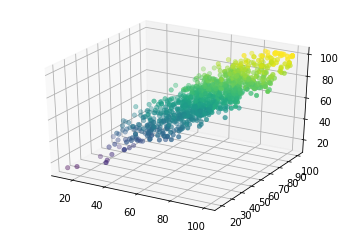

In [5]:
X1 = df['Math'].values
X2 = df['Reading'].values
Y = df['Writing'].values

ax = plt.axes(projection='3d')
ax.scatter(X1, X2, Y, c=Y, cmap='viridis', linewidth=0.5);
plt.savefig('data.png')

In [6]:
X0 = np.ones(len(X1))
X = np.array([X0,X1,X2]).T
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.05)
print("X_train shape:",x_train.shape,"\nY_train shape:",y_train.shape)
print("X_test shape:",x_test.shape,"\nY_test shape:",y_test.shape)

X_train shape: (950, 3) 
Y_train shape: (950,)
X_test shape: (50, 3) 
Y_test shape: (50,)


# Gradient Descent

In [7]:
Q = np.zeros(3)
n = len(X1)

In [20]:
def cost_function(X,Y,Q):
    return np.sum(((X.dot(Q)-Y)**2)/(2*n))

## Q =  theta(Parameters)

In [21]:
cost_function(X,Y,Q)

2470.11

In [22]:
def gradient_descent(X,Y,Q,epochs,alpha):
    cost_history = np.zeros(epochs)
    for i in range(epochs):
        pred = X.dot(Q)
        loss = pred-Y
        gradient = X.T.dot(loss)/n
        Q = Q-gradient*alpha
        cost_history[i] = cost_function(X,Y,Q)
    return cost_history,Q

In [34]:
start = time.time()
cost_his,parameters = gradient_descent(x_train,y_train.flatten(),Q,400,0.0001)
end = time.time()
print((end - start)*1000)

25.33268928527832


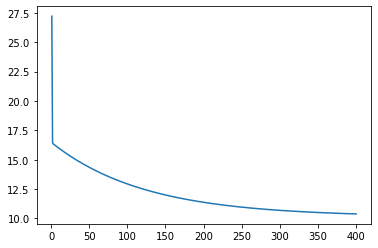

In [35]:
x = [i for i in range(1,401)]
plt.plot(x,cost_his)
plt.savefig('cost_fn.png')

In [36]:
parameters

array([0.00633596, 0.16806309, 0.82010215])

In [37]:
y_pred = x_test.dot(parameters)
np.sqrt(mean_squared_error(y_pred,y_test))

3.8624138731987654

# With normal Equation

In [41]:
start = time.time()
Q1 = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
end = time.time()
print((end - start)*1000)

3.1588077545166016


In [32]:
paramters_of_normal_Eq = Q1
paramters_of_normal_Eq

array([-1.35504257,  0.09698528,  0.90741476])

In [33]:
pred_y = x_test.dot(Q1)
np.sqrt(mean_squared_error(pred_y,y_test))

3.6880160868980996